# Chapter 12. Using Colors in Plots

> Instead of simply moving geoms left and right or making them larger and smaller, when you use color, there are many degrees of freedom and many more choices to make. What palette should you use for discrete values? Should you use a gradient with several different hues? How do you choose colors that can be interpreted accurately by those with color-vision deficiencies?

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 12.1 Setting the Colors of Objects

> In **ggplot2**, there’s an important difference between *setting* and *mapping* aesthetic properties.

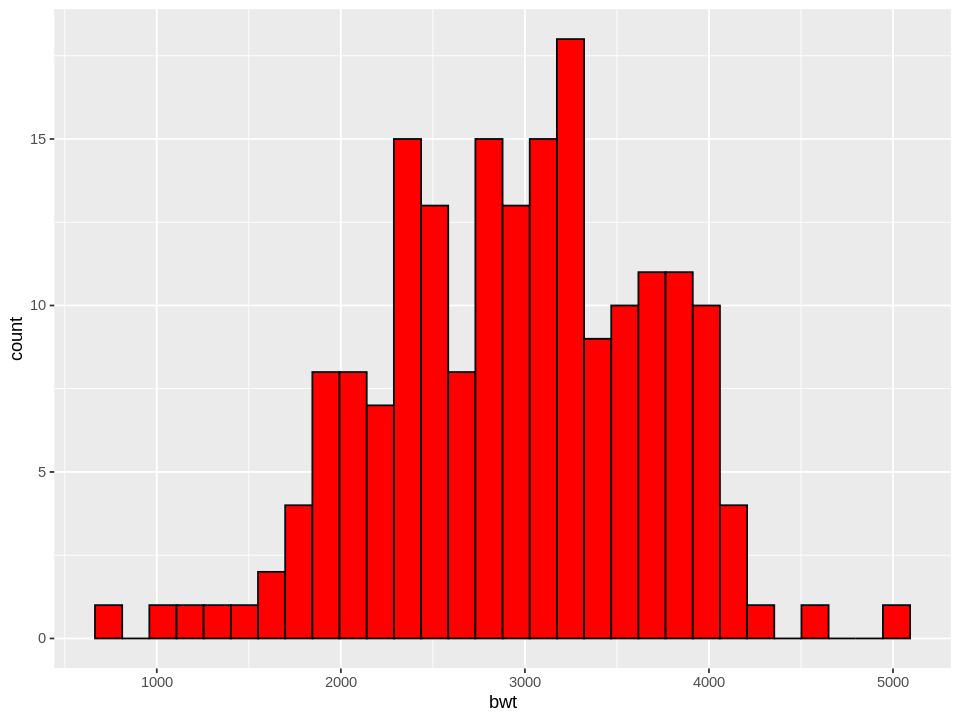

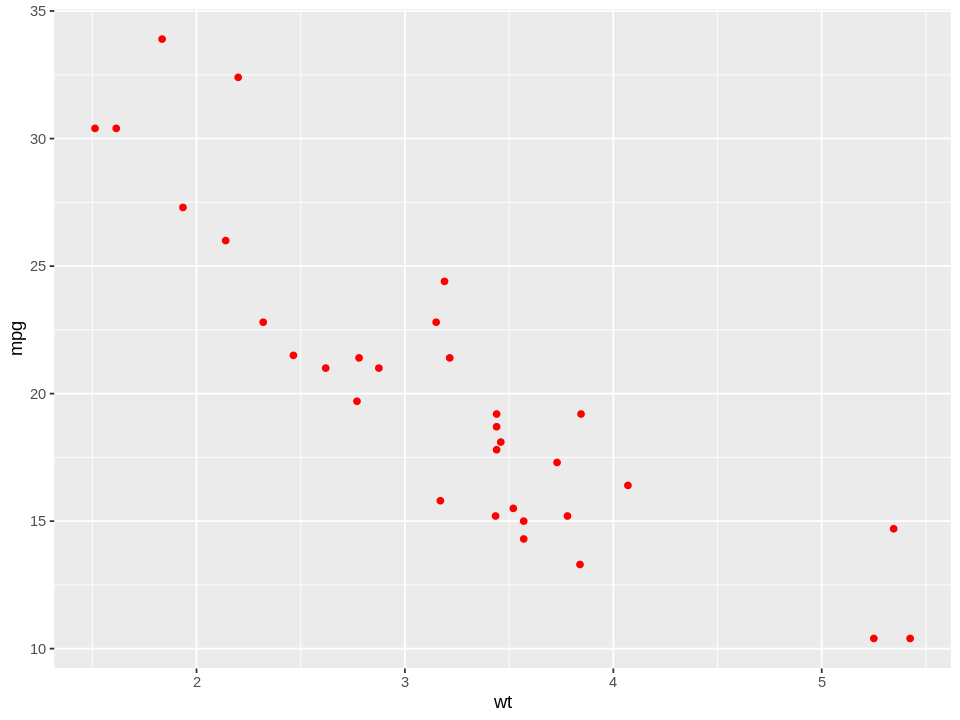

In [2]:
ggplot(MASS::birthwt, aes(bwt)) +
  geom_histogram(bins = 30, color = "black", fill = "red")

ggplot(mtcars, aes(wt, mpg)) +
  geom_point(color = "red")

## 12.2 Representing Variables with Colors

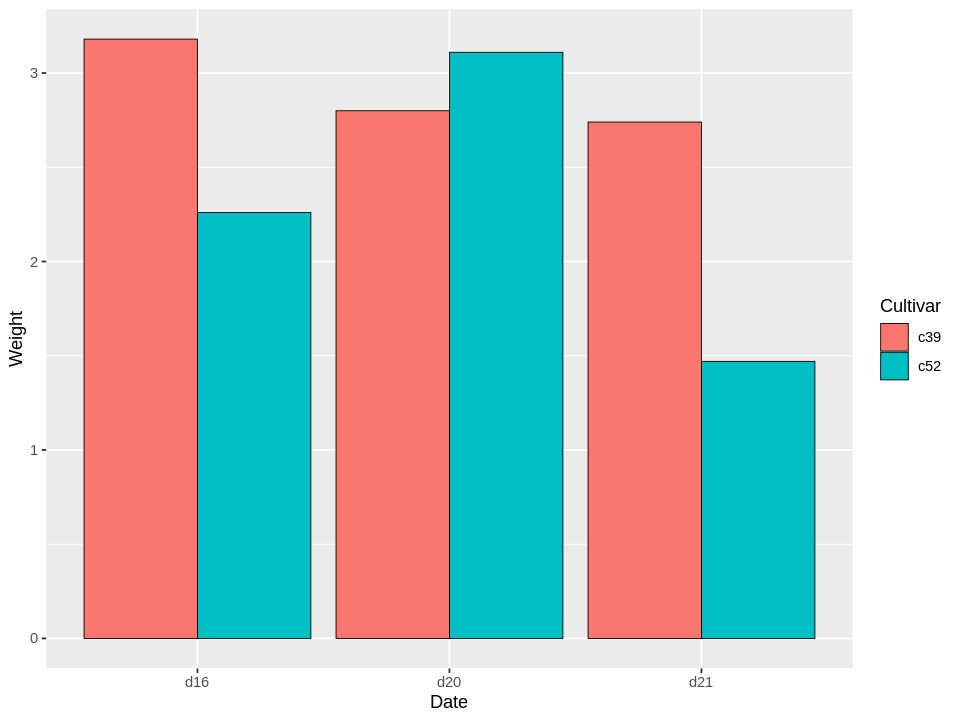

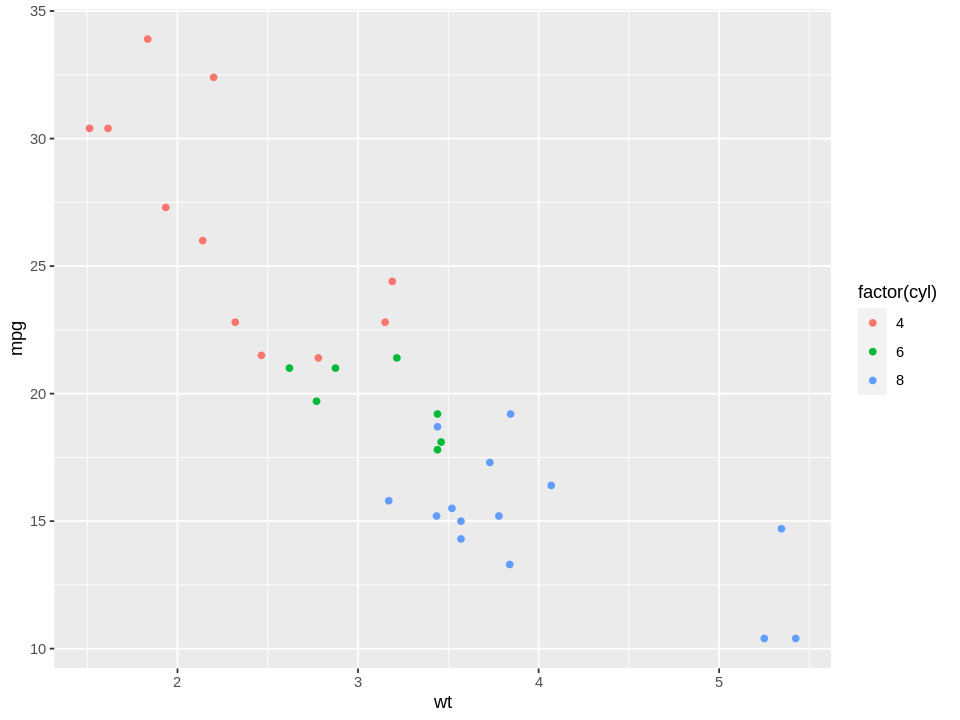

In [3]:
ggplot(gcookbook::cabbage_exp, aes(Date, Weight, fill = Cultivar)) +
  geom_col(color = "black", position = "dodge", size = .25)

qplot(wt, mpg, color = factor(cyl), data = mtcars)

## 12.3 Using a Colorblind-Friendly Palette

> The **viridis** package contains a set of beautiful color scales that are each designed to span as wide a palette as possible, making it easier to see differences in your data. These scales are also designed to be perceptually uniform, printable in greyscale, and easier to read by those with colorblindness.

> You will need to add `scale_fill_viridis_c()` to your plot if your data is continuous. If your data is discrete you will need to use `scale_fill_viridis_d()` instead.

> About 8 percent of males and 0.5 percent of females have some form of color-vision deficiency, so there’s a good chance that someone in your audience will be among them. There are many different forms of color blindness—the palettes that are mentioned in this book are designed to enable people with any of the most common forms of color-vision deficiency to distinguish the colors. (Monochromacy, or total colorblindness, is rare. Those who have it can only see differences in brightness.)

> There are also other color palettes that are friendly to users with color blindness, such as those in the **cetcolor** package.

> The cetcolor scales: *https://github.com/coatless/cetcolor*.

> The [Color Oracle program](http://colororacle.org/) can simulate how things on your screen appear to someone with color-vision deficiency, but keep in mind that the simulation isn’t perfect. In my informal testing, I viewed an image with simulated red-green deficiency, and I could distinguish the colors just fine—but others with actual red-green deficiency viewed the same image and couldn’t tell the colors apart!

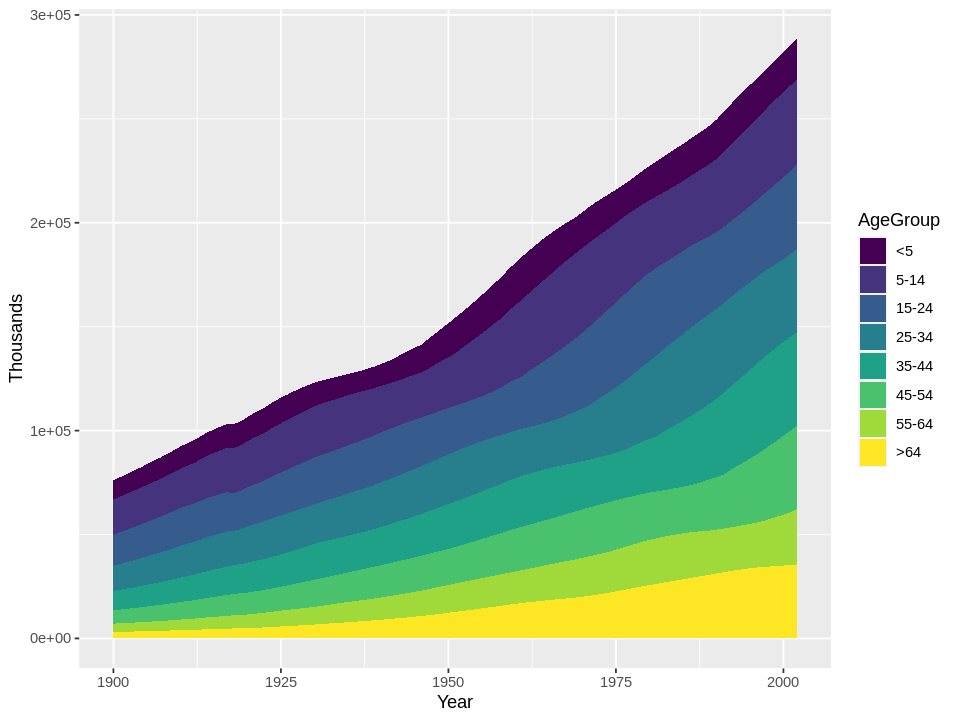

In [4]:
qplot(Year, Thousands, fill = AgeGroup, data = gcookbook::uspopage, geom = "area") +
  scale_fill_viridis_d()

## 12.4 Using a Different Palette for a Discrete Variable

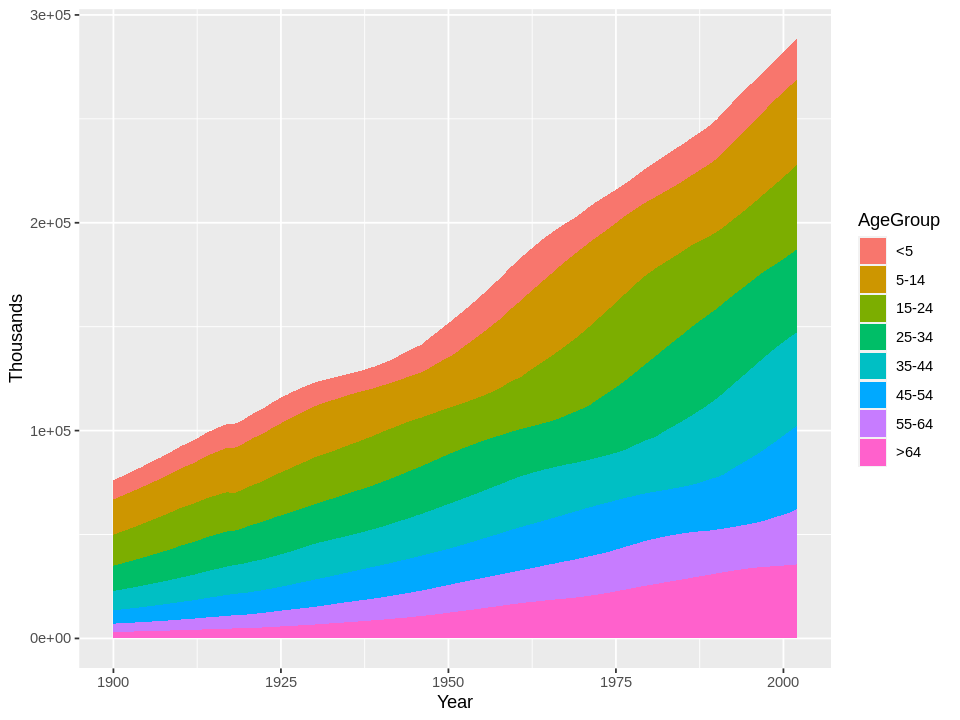

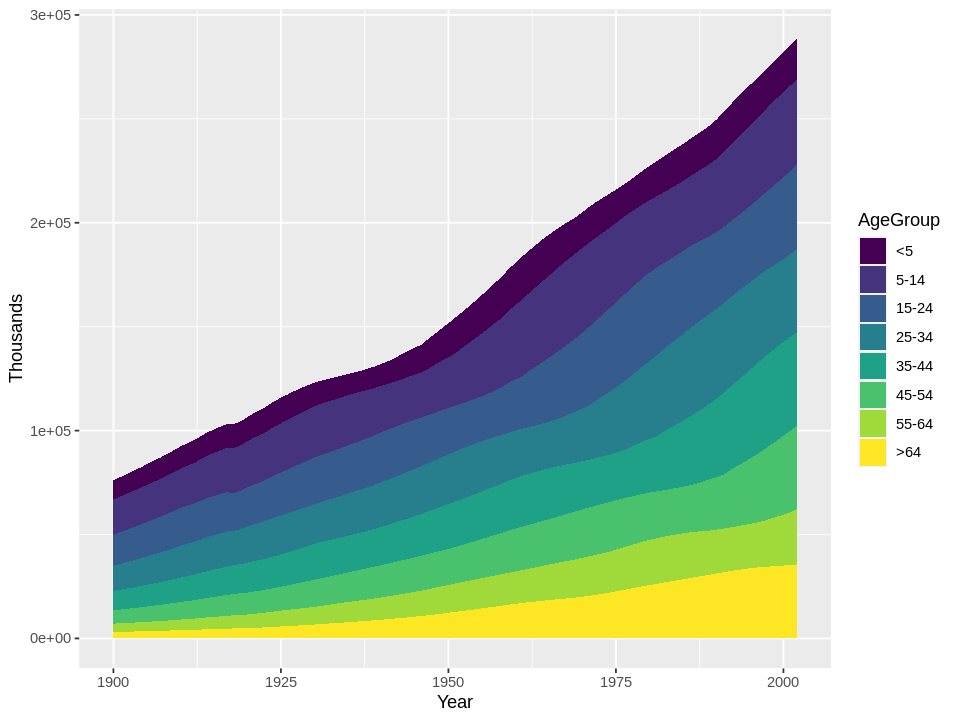

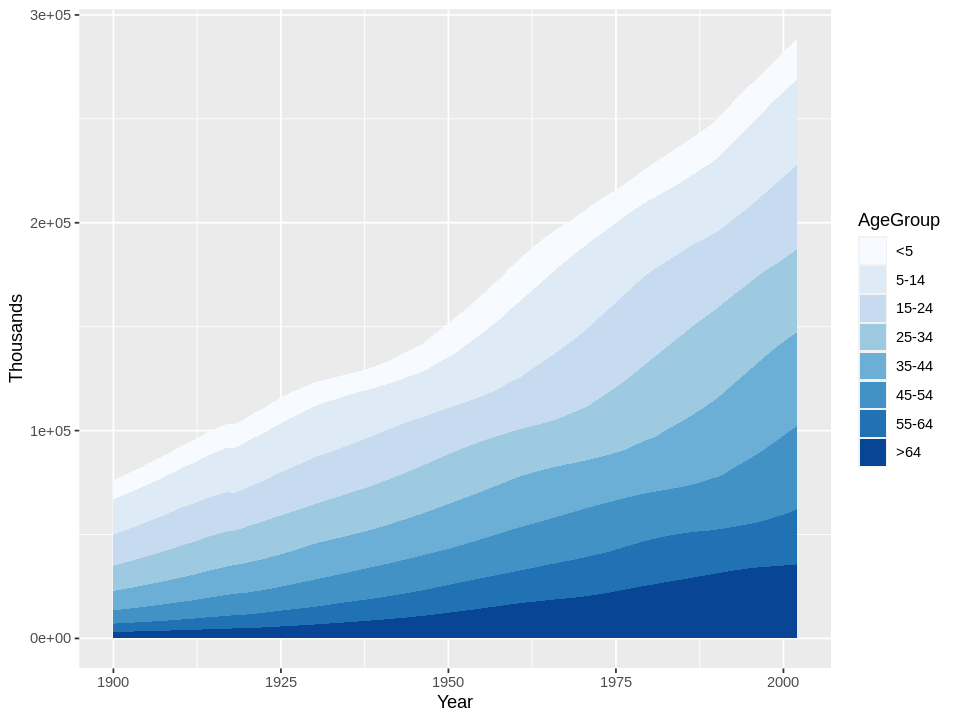

In [5]:
qplot(Year, Thousands, fill = AgeGroup, data = gcookbook::uspopage, geom = "area") +
  scale_fill_hue()

qplot(Year, Thousands, fill = AgeGroup, data = gcookbook::uspopage, geom = "area") +
  scale_fill_viridis_d()

qplot(Year, Thousands, fill = AgeGroup, data = gcookbook::uspopage, geom = "area") +
  scale_fill_brewer()

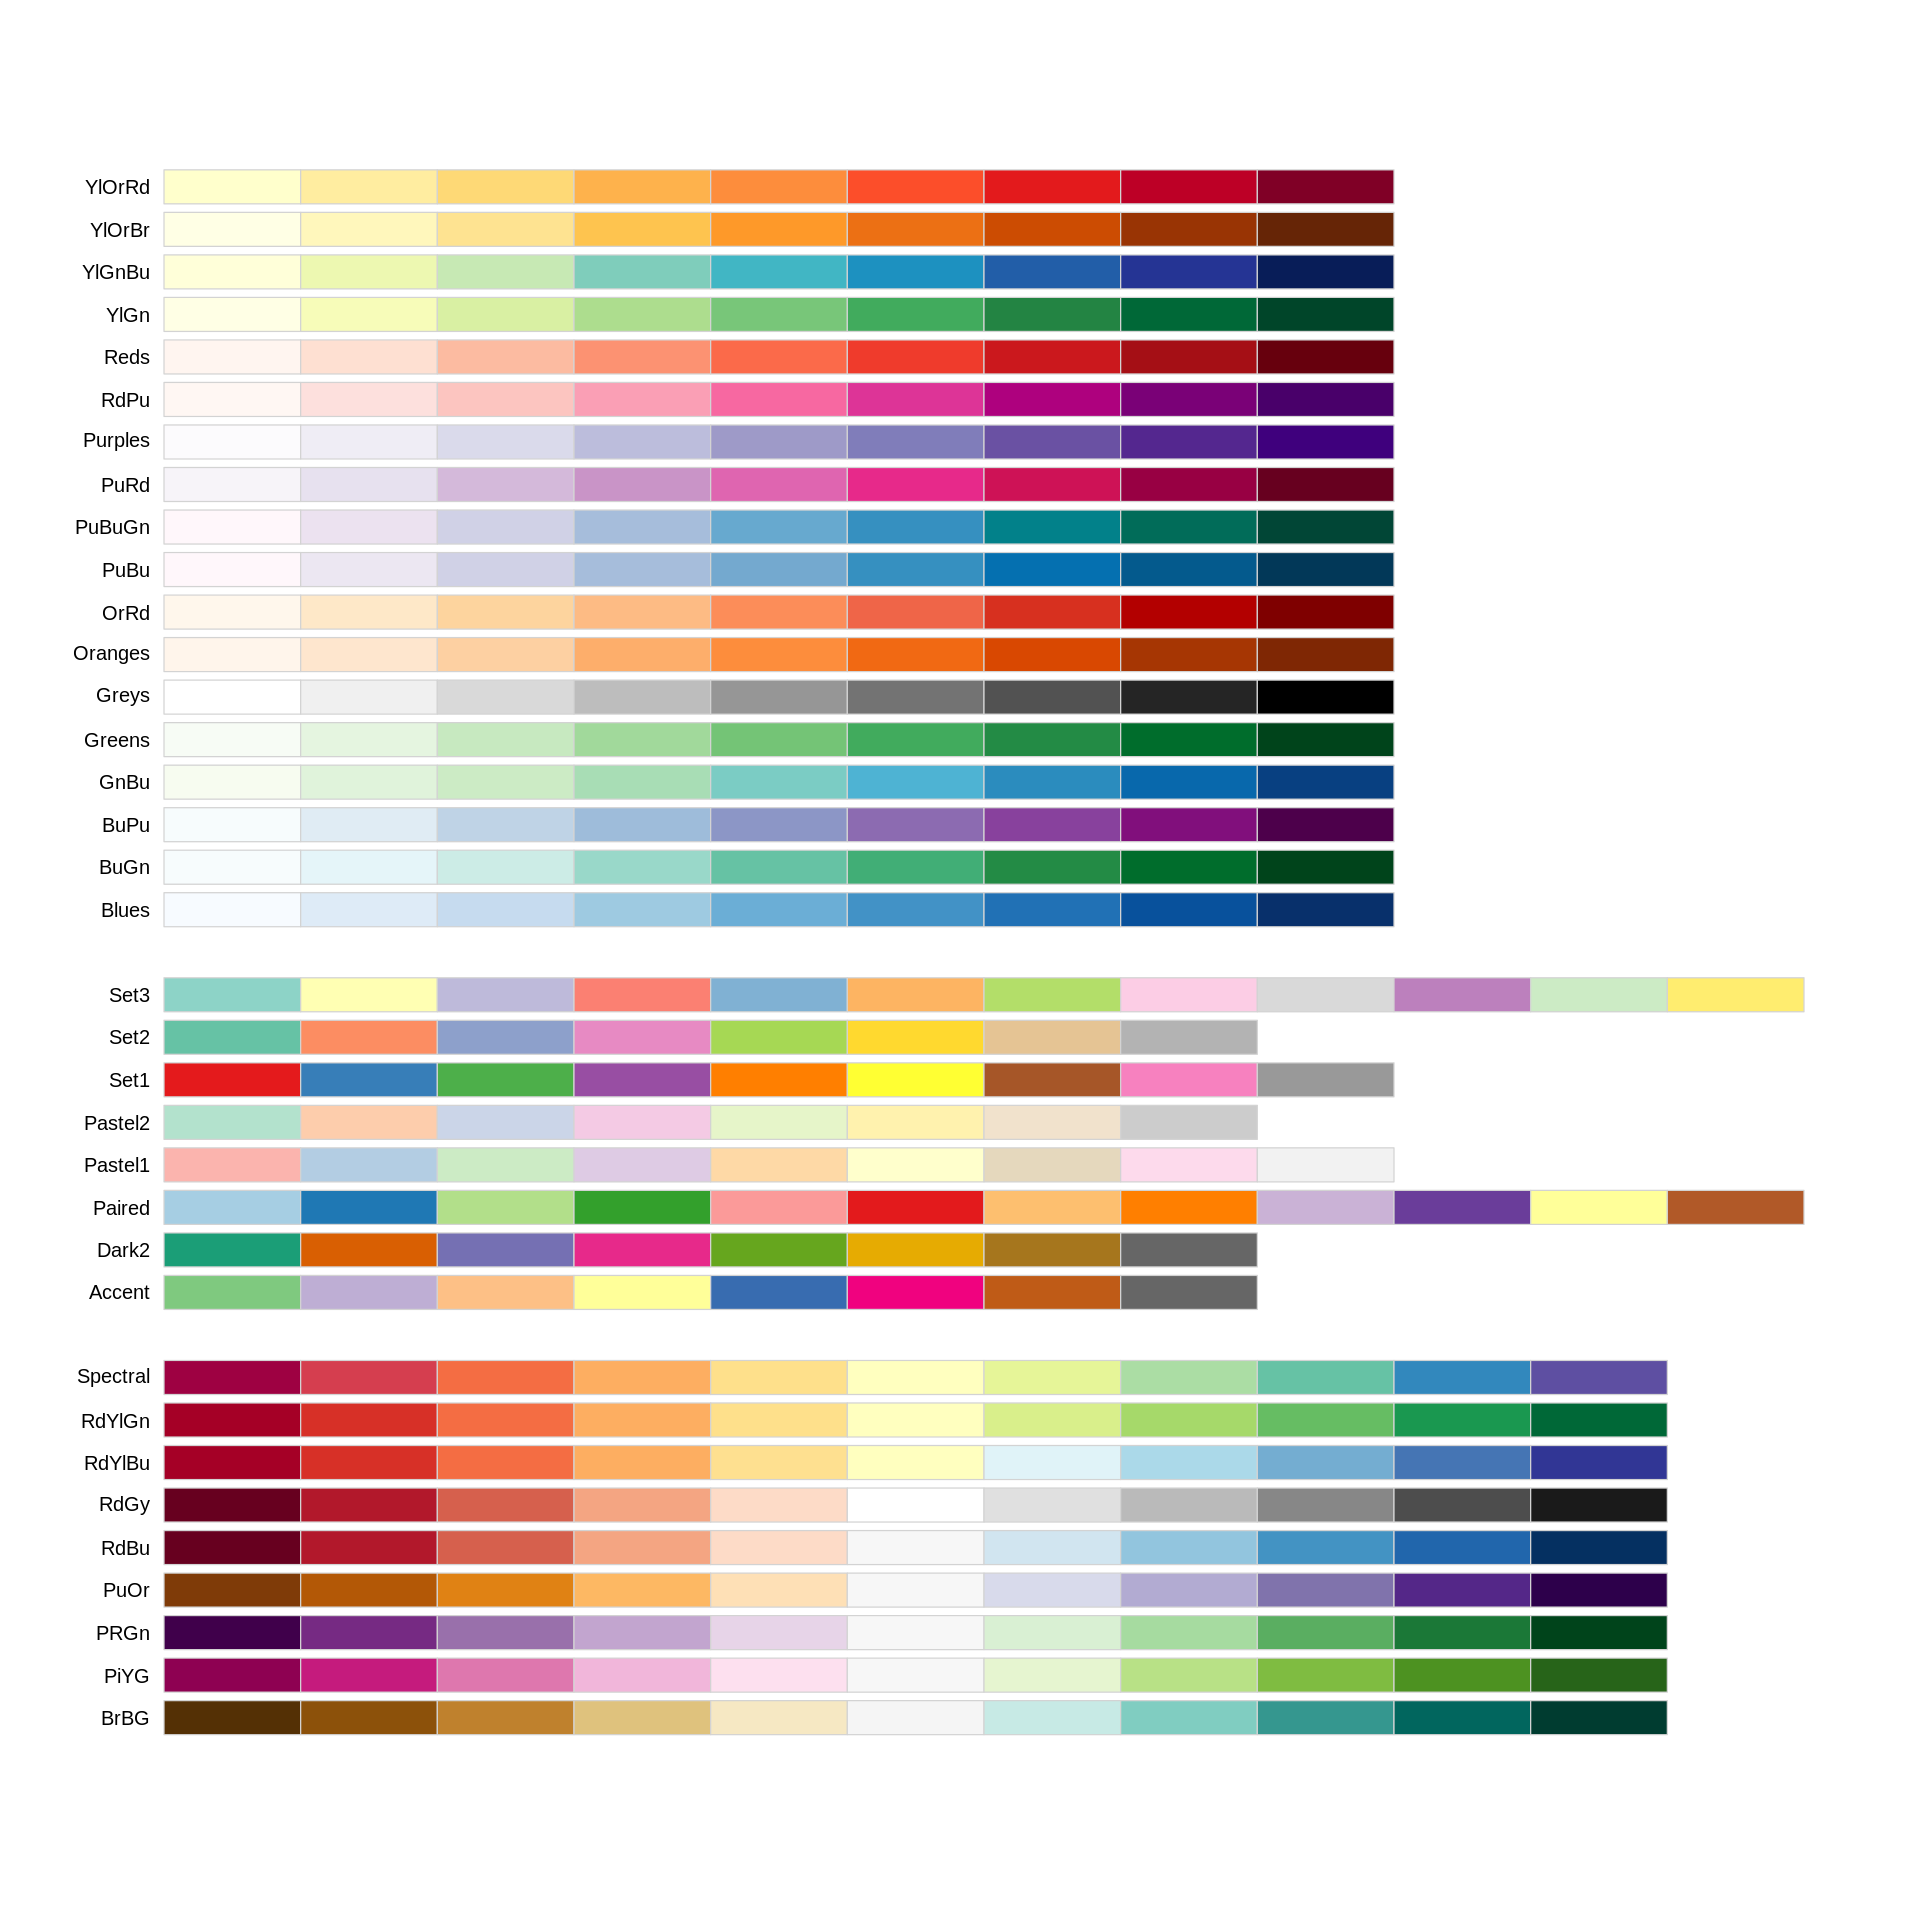

In [6]:
options(repr.plot.width = 16, repr.plot.height = 16)
RColorBrewer::display.brewer.all()
options(repr.plot.width = 8, repr.plot.height = 6)

> With `scale_fill_hue()`, the colors are taken from around the color wheel in the HCL (hue-chroma-lightness) color space. The default lightness value is 65 on a scale from 0–100. This is good for filled areas, but it’s a bit light for points and lines. To make the colors darker for points and lines set the value of l (luminance/lightness).

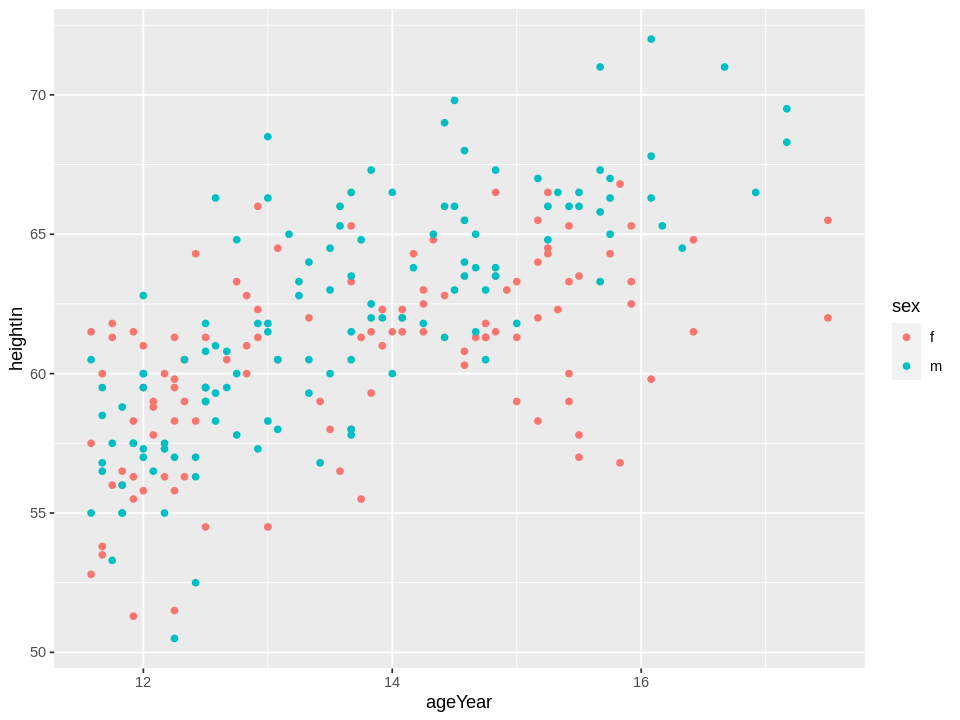

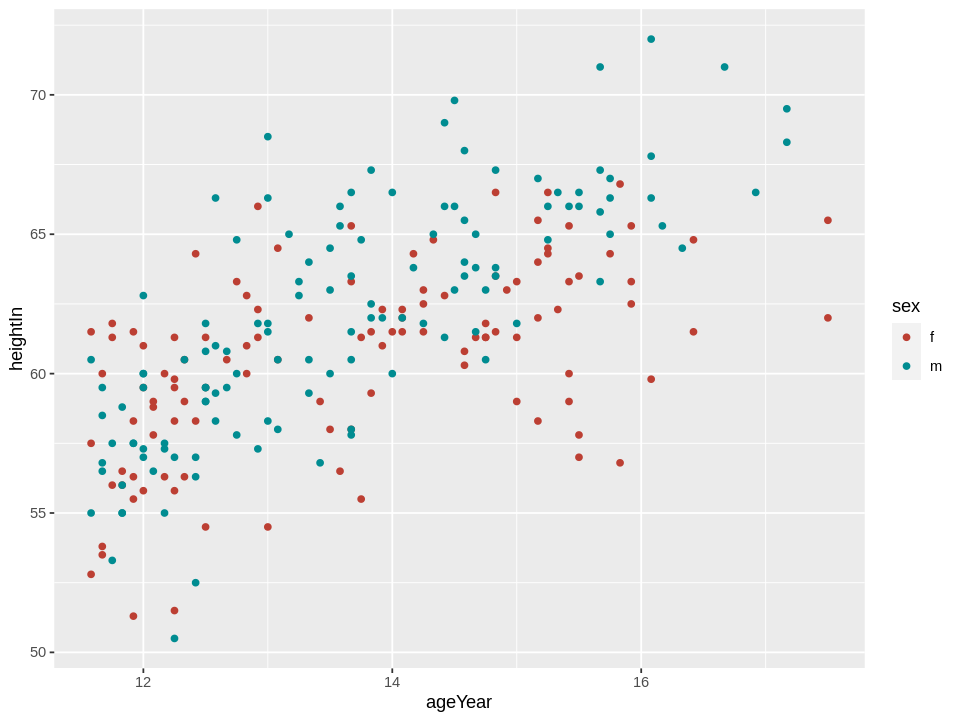

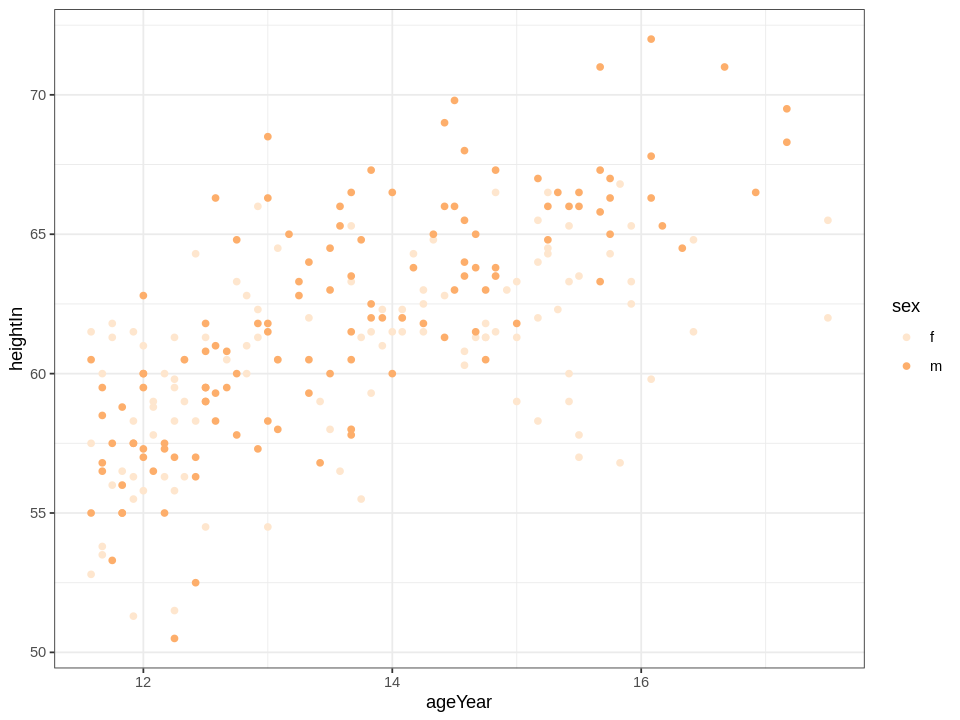

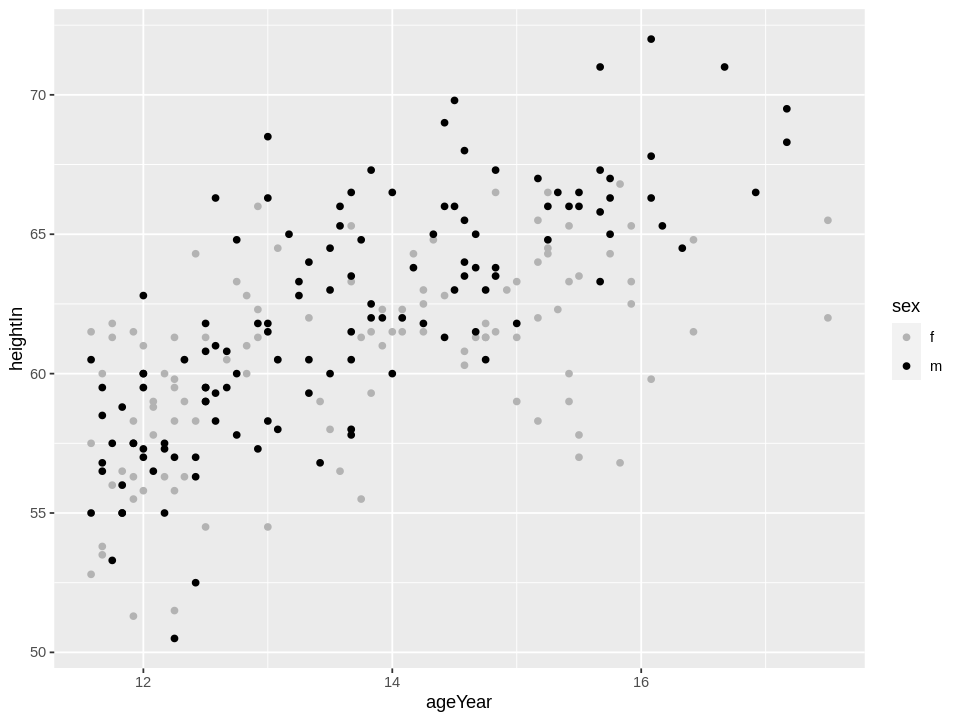

In [7]:
qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight)

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  scale_color_hue(l = 45)

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  scale_color_brewer(palette = "Oranges") +
  theme_bw()

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  scale_color_grey(end = 0, start = .7)

> For more about **viridis**, see *https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html*. For more about **ColorBrewer**, see *http://colorbrewer2.org*.

## 12.5 Using a Manually Defined Palette for a Discrete Variable

> If the variable is a character vector, not a factor, it will automatically be converted to a factor, and by default the levels will appear in alphabetical order.

> Here are some rules of thumb for specifying and adjusting RGB colors:
> - In general, higher numbers are brighter and lower numbers are darker.
> - To get a shade of grey, set all the channels to the same value.
> - The opposites of RGB are CMY: Cyan, Magenta, and Yellow. Higher values for the red channel make it more red, and lower values make it more cyan. The same is true for the pairs green and magenta, and blue and yellow.

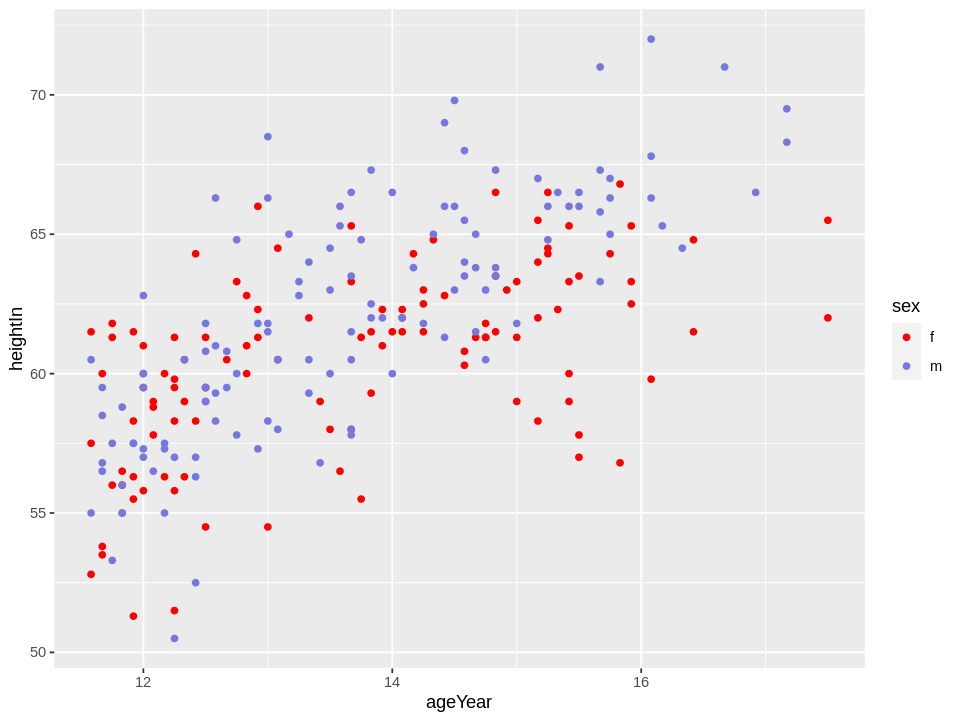

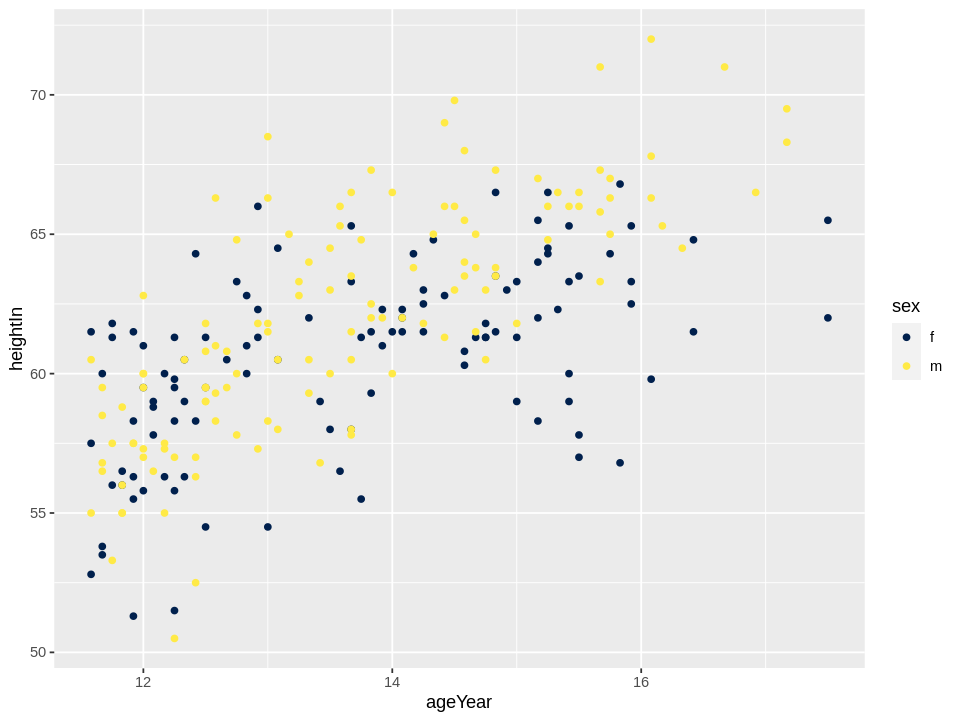

In [8]:
qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  scale_color_manual(values = c(f = "red", m = "#7777DD"))

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  scale_color_manual(
    values = viridisLite::cividis(
      length(levels(gcookbook::heightweight$sex))
    )
  )

## 12.6 Using a Manually Defined Palette for a Continuous Variable

> Notice that we used the `muted()` function in the examples. This is a function from the **scales** package that returns an RGB value that is a less-saturated version of the color chosen.

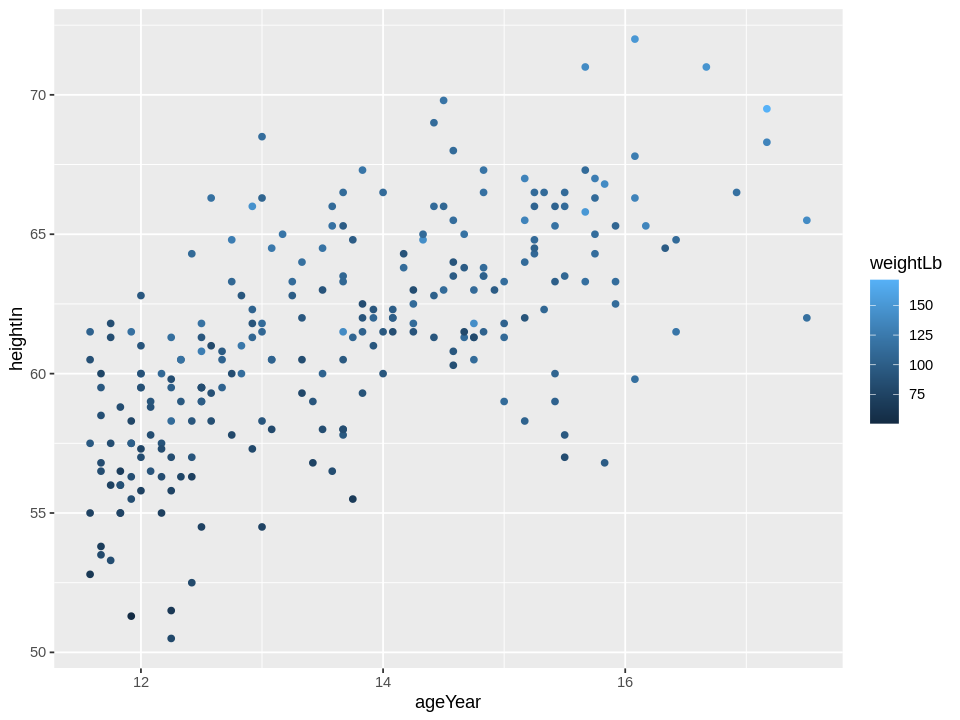

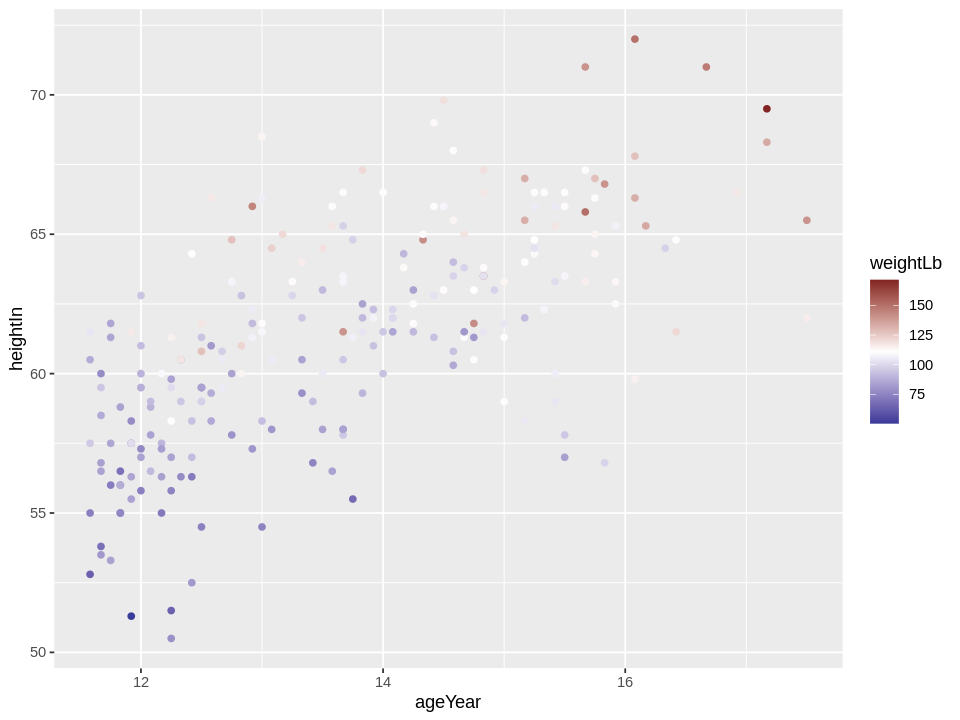

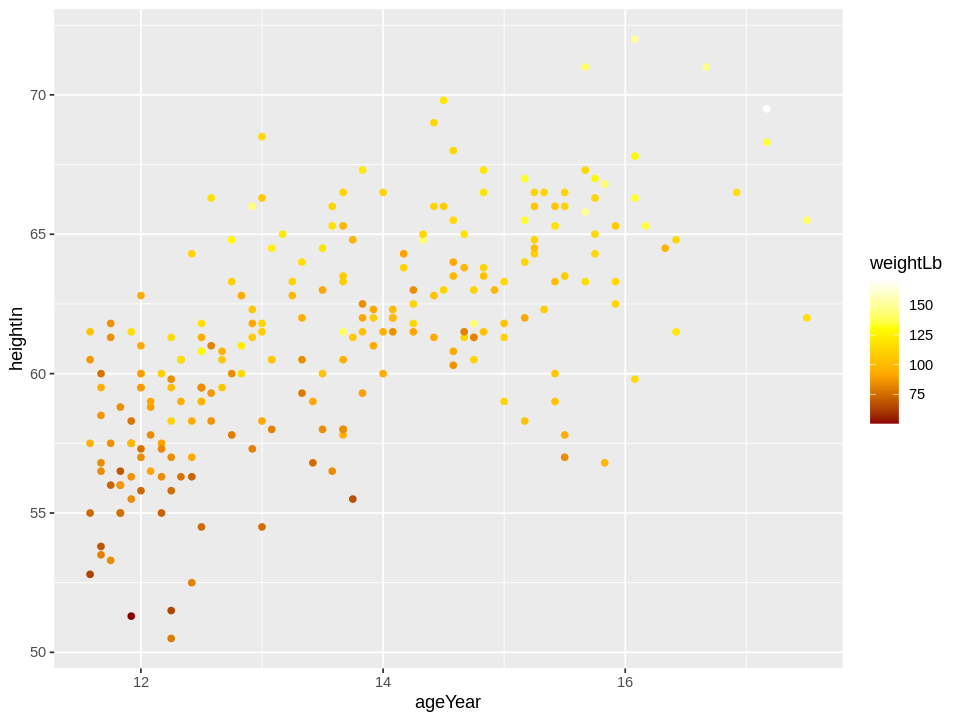

In [9]:
qplot(ageYear, heightIn, color = weightLb, data = gcookbook::heightweight)

qplot(ageYear, heightIn, color = weightLb, data = gcookbook::heightweight) +
  scale_color_gradient2(
    high = scales::muted("red"),
    low = scales::muted("blue"),
    mid = "white",
    midpoint = mean(range(gcookbook::heightweight$weightLb)),
  )

qplot(ageYear, heightIn, color = weightLb, data = gcookbook::heightweight) +
  scale_color_gradientn(
    colors = c("darkred", "orange", "yellow", "white")
  )

## 12.7 Coloring a Shaded Region Based on Value

> If you look closely at the figure, you’ll notice that there are some stray shaded areas near the zero line. This is because each of the two colored areas is a single polygon bounded by the data points, and the data points are not actually at zero. To solve this problem, we can interpolate the data to 1,000 points by using `approx()`. It would be more precise (and more complicated) to interpolate exactly where the line crosses zero, but `approx()` works fine for the purposes here.

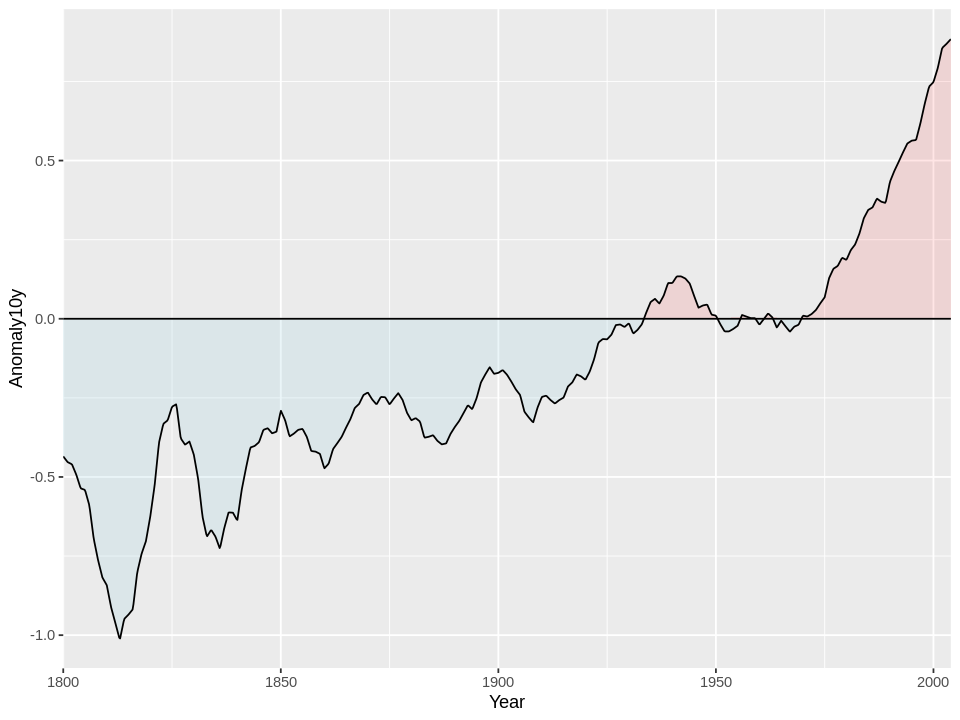

In [10]:
filter(gcookbook::climate, Source == "Berkeley") %>%
  (function(df) {
    as_tibble(approx(df$Year, df$Anomaly10y, n = 1000)) %>%
      rename(Year = x, Anomaly10y = y)
  }) %>%
  ggplot(aes(Year, Anomaly10y)) +
  geom_area(aes(fill = Anomaly10y > 0)) +
  geom_line() +
  geom_hline(yintercept = 0) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_fill_manual(
    guide = FALSE,
    values = c(
      `TRUE` = scales::alpha("red", .1),
      `FALSE` = scales::alpha("lightblue", .25)
    )
  )